<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Откройте и изучите файл</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

## Описание проекта

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
%pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
pth1 = 'users_behavior.csv'
pth2 = '/datasets/users_behavior.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
df.duplicated().sum()

0

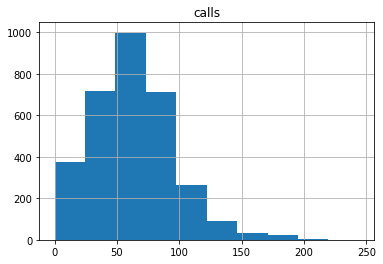

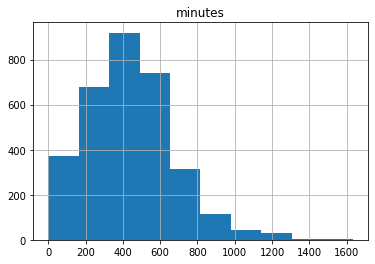

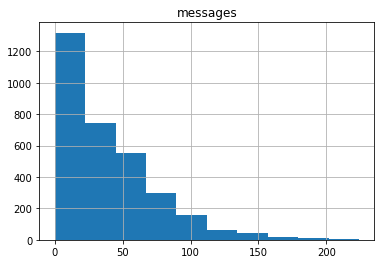

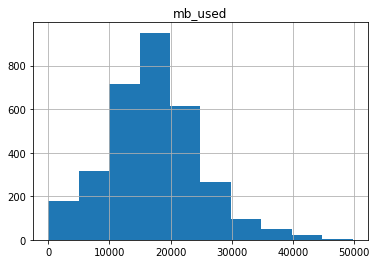

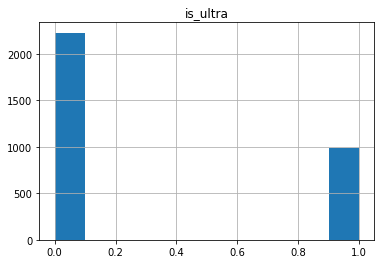

In [8]:
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show();

### Выводы

Датасет содержит 3214 записей. 31% данных относится к тарифу Ультра, остальные - к тарифу Смарт. Пропуски отсутствуют, дублирующихся строк нет. Предварительно можно утверждать, что, данных достаточно для проведения исследования.

## Разбейте данные на выборки

Разобьем данные на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [9]:
df_train, df_valid_and_test = train_test_split(df, test_size=0.4, random_state=123)
df_valid, df_test = train_test_split(df_valid_and_test, test_size=0.5, random_state=123)

Выделим признаки и целевой показатель

In [10]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

## Исследуйте модели

Исследуем модель Решающего Дерева, для подбора лучшей модели будем варьировать гиперпараметр - max_depth. 

In [11]:
best_accuracy_dt = 0
list_depth=[]
list_accuracy=[]
for depth in range(1,16):
    start_time = time.time()
    model = DecisionTreeClassifier(max_depth = depth, random_state=123)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accurcy = accuracy_score(predictions, target_valid)
    elapsed_time = time.time() - start_time
    list_depth.append(depth)
    list_accuracy.append(accurcy)
    if accurcy > best_accuracy_dt:
        best_model_dt = model
        best_accuracy_dt = accurcy
        elapsed_time_dt = elapsed_time
        best_depth = depth
print(f'Accuracy лучшей модели на валидационной выборке: {best_accuracy_dt}')
print(f'Глубина лучшей модели на валидационной выборке: {best_depth}')
print(f'Время расчета лучшей модели: {elapsed_time} с')

Accuracy лучшей модели на валидационной выборке: 0.8227060653188181
Глубина лучшей модели на валидационной выборке: 5
Время расчета лучшей модели: 0.00797271728515625 с


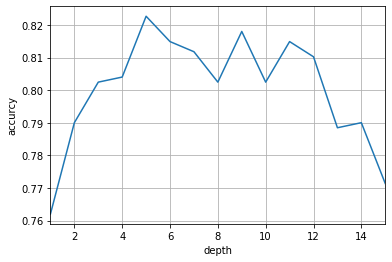

In [12]:
pd.Series(list_accuracy, index=list_depth).plot()
plt.xlabel('depth')
plt.ylabel('accurcy')
plt.grid()

Максимальная доля правильных ответов наблюдается для глубины дерева, равной пяти. С увеличением глубины выше 12 качество модели снижается.

Исследуем модель Случайного Леса для разных значений гиперпараметров: n_estimators и max_depth 

In [13]:
best_accuracy_rf = 0
list_est=[]
list_depth=[]
list_accuracy=[]
for est in range(10, 101, 10):
    for depth in range(1,16):
        start_time = time.time()
        model = RandomForestClassifier(n_estimators=est, max_depth = depth, random_state=123)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accurcy = accuracy_score(predictions, target_valid)
        elapsed_time = time.time() - start_time
        list_est.append(est)
        list_depth.append(depth)
        list_accuracy.append(accurcy)
        if accurcy > best_accuracy_rf:
            best_model_rf = model
            best_accuracy_rf = accurcy
            elapsed_time_rf = elapsed_time
            best_est = est
            best_depth = depth
print(f'Accuracy лучшей модели на валидационной выборке: {best_accuracy_rf}')
print(f'Количество деревьев лучшей модели на валидационной выборке: {best_est}')
print(f'Глубина лучшей модели на валидационной выборке: {best_depth}')
print(f'Время расчета лучшей модели: {elapsed_time} с')

Accuracy лучшей модели на валидационной выборке: 0.8351477449455676
Количество деревьев лучшей модели на валидационной выборке: 70
Глубина лучшей модели на валидационной выборке: 9
Время расчета лучшей модели: 0.3083317279815674 с


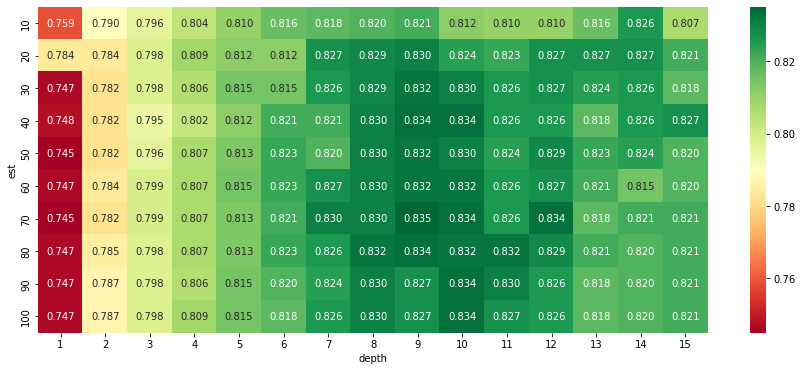

In [14]:
plt.figure(figsize=(15,6))
(sns.heatmap(pd.DataFrame({'est':list_est, 'depth':list_depth, 'accuracy':list_accuracy}).
    pivot_table(index='est', columns='depth', values='accuracy'), cmap='RdYlGn', annot=True, fmt='0.3f'))
                

Наилучшее качество модель демонстрирует при глубине деревьев от 8 до 10, количество деревьев от 20 до 100 показывают примерно одинаковую предсказательную способность. 

Построим модель Логистической Регрессии

In [15]:
model_lr = LogisticRegression(random_state=123)
start_time = time.time()
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)
accuracy_lr = accuracy_score(predictions, target_valid)
elapsed_time_lr = time.time() - start_time
print(f'Accuracy  модели на валидационной выборке: {accuracy_lr}')
print(f'Время расчета модели: {elapsed_time_lr} с')

Accuracy  модели на валидационной выборке: 0.7200622083981337
Время расчета модели: 0.011960029602050781 с


C:\Users\Acer\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Сравним полученные модели

In [16]:
pd.DataFrame([[best_accuracy_dt, best_accuracy_rf, accuracy_lr], 
              [elapsed_time_dt, elapsed_time_rf,elapsed_time_lr]],
            columns=['Decision Tree', 'Random Forest', 'Logistic Regression'],
            index= ['accuracy', 'elapsed_time'])
    

,Decision Tree,Random Forest,Logistic Regression
accuracy,0.822706,0.835148,0.720062
elapsed_time,0.003990,0.171749,0.011960


Самая высокая для правильных ответов на валидационной выборке (0.835) показывает модель Случайного Леса (с гиперпараметрами n_estimator=70 и max_depth=9). Доля правильных ответов модели Решающего Дерева с максимальной глубиной, равной пяти, составляет 0,823, что незначительно ниже модели Случайного Леса. При этом скорость расчета модели Решающего Дерева на порядок выше. У модели Логистической Регрессии доля правильных ответов составляет 0,72, что примерно на 15% меньше двух других моделей.

### Выводы

Задача классификации решалась на основе моделей Решающего Дерева, Случайного Леса и Логистической Регрессиии. Были подобраны оптимальные гиперпараметры для моделей Решающего Дерева (max_depth=5) и Случайного Леса (n_estimator=70 и max_depth=9) путем максимизации метрики accurancy на валидационной выборке.  
У моделей Дерева Решений и Случайного Леса сопоставимая доля правильных ответов на валидационной выборке (0,823 и 0,835 соответственно), при этом время расчета по модели Случайного Леса на порядок выше.  
Модель Логистической Регрессии (без оптимизации гиперпараметров) уступает по метрике качества модели accuracy примерно на 15%, время расчета несколько выше модели Решающего Дерева и существенно ниже модели Случайного Леса.

## Проверьте модель на тестовой выборке

In [17]:
predictions_dt = best_model_dt.predict(features_test)
predictions_rf = best_model_rf.predict(features_test)
predictions_lr = model_lr.predict(features_test)

accuracy_dt = accuracy_score(predictions_dt, target_test)
accuracy_rf = accuracy_score(predictions_rf, target_test)
accuracy_lr = accuracy_score(predictions_lr, target_test)

print(f'Accuracy лучшей модели Decision Tree на тестовой выборке: {accuracy_dt}')
print(f'Accuracy лучшей модели Random Fosrest на тестовой выборке: {accuracy_rf}')
print(f'Accuracy модели Logistic Regression на тестовой выборке: {accuracy_lr}')

Accuracy лучшей модели Decision Tree на тестовой выборке: 0.7713841368584758
Accuracy лучшей модели Random Fosrest на тестовой выборке: 0.7869362363919129
Accuracy модели Logistic Regression на тестовой выборке: 0.6967340590979783


### Выводы
Расчеты на тестовой выборке по моделям Дерева Решений и Случайного Леса удовлетворяют условиям по достижению минимальной доли правильных ответов (0,75), однако несколько снизились по сравнению с валидационной выборкой, что свидетельствует о некоторой переподгонке на этапе оптимизации гиперпараметров.

## (бонус) Проверьте модели на адекватность

Для оценки адекватности, сравним полученные модели со случайной. Т.к. тарифов всего два, то при случайном выборе вероятность каждого исхода равна 0,5 , соответственно доля правильных ответов в таком случае также будет равна 0,5

In [18]:
((df_test['is_ultra'].value_counts()/len(df_test['is_ultra']))[0]*0.5+
    (df_test['is_ultra'].value_counts()/len(df_test['is_ultra']))[1]*0.5)

0.5

Т.к. доля правильных ответов по всем моделям выше данного значения, значит можно сделать вывод об адекватности, полученных моделей.

## Выводы

Для решения поставленной задачи были происследованы три модели классификации: Дерево Решений, Случайный Лес, Логистическая Регрессия; подобраны оптимальные гиперпараметры для модели Дерева Решений (max_depth=5) и Случайного Леса (n_estimators=70, max_depth=9). Доля правильных ответов на тестовой выборке составляет 0,771 для Дерева Решений и 0,787 для Случайного Леса. Для модели Логистической Регрессии без оптимизации гиперпараметров метрика accuracy равна 0,697. Таким образом, обученная модель Случайного Леса может быть рекомендована для выбора подходящего тарифа.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [м] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
